In [77]:
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,validation_curve,cross_val_score
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Normalization and Standardization

**Normalization** : Scaling technique in which values are shifted and rescaled, so that they range between 0 and 1.


**Standardization** : Scaling technique where the values are centered around the mean with unit standard deviation. 

Text(0.5, 1.0, 'Scaled Data')

<Figure size 432x288 with 0 Axes>

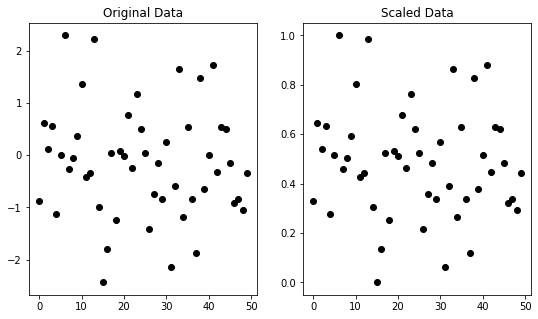

In [78]:
# using MinMaxScaler
from sklearn.datasets import make_regression

plt.figure()
X, y = make_regression(n_samples = 50, n_features=1,
                            n_informative=1, bias = 10.0,
                            noise = 150, random_state=2)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
axes[0].plot(X,'o',color='black')
axes[1].plot(X_scaled,'o',color='black')
axes[0].set_title("Original Data")
axes[1].set_title("Scaled Data")


In [79]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

#scales to -1,1 range based on absolute maximum
maxabs_scaler = MaxAbsScaler()
X_maxabs_scaled = maxabs_scaler.fit_transform(X)

#uses 1 to 3 quartiles
robust_scaler = RobustScaler(quantile_range=(0.1,0.7))
X_robust_scaled = robust_scaler.fit_transform(X)


In [80]:
#standaridaztion

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Regularization on a Linear model

Same case study as the Linear model. We're dealing with the Life Expectancy dataset. 

In [81]:
from sklearn.linear_model import Ridge, Lasso

X, y = make_regression(n_samples = 50, n_features=1,
                            n_informative=1, bias = 10.0,
                            noise = 150, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22, test_size=0.2)

ridgeModel = Ridge(alpha=0.25)
ridgeModel.fit(X_train, y_train)
cross_val_score(ridgeModel,X,y,cv=5)

array([ 0.06872815,  0.20987532, -0.38963129, -0.41021787, -0.11882873])

In [82]:
lassoModel = Lasso(alpha=0.45)
lassoModel.fit(X_train, y_train)
cross_val_score(lassoModel,X,y,cv=5)

array([ 0.06865302,  0.20827315, -0.38892125, -0.41022888, -0.11931677])

In [83]:
#finding path, ugh don't ask!
path, file = os.path.split(os.path.abspath("Life_Expectancy_Data.csv"))
path = path+'\data\\'

#loading data
data = pd.read_csv(path+file)

target = 'Life expectancy '
cols = ['Life expectancy ',
      'Alcohol', 'percentage expenditure', 'Hepatitis B',
       ' BMI ',  'Polio', 'Total expenditure',
       'Diphtheria ',  'GDP', 
       'Income composition of resources', 'Schooling']
data.dropna(inplace=True)

#splitting data
X_train, X_test, y_train, y_test = train_test_split(data[cols[1:]], data[target], random_state = 2, test_size =0.2)

#create model
reg = LinearRegression().fit(X_train, y_train)

#making predictions
y_pred = reg.predict(X_test)

## without regularization

In [84]:
#validate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error: {}'.format(mse))
print('R-squared Error: {}'.format(r2))
print('Cross validation Score: ',cross_val_score(reg, X_train, y_train, cv=5))

Mean Squared Error: 28.989551051546545
R-squared Error: 0.6542775615619447
Cross validation Score:  [0.64104672 0.63257221 0.5829629  0.6613591  0.56388255]


## with Regularization

In [85]:
rmodel = Ridge(alpha=10).fit(X_train, y_train)
r_pred = rmodel.predict(X_test)

mse = mean_squared_error(y_test, r_pred)
r2 = r2_score(y_test, r_pred)

print('Mean Squared Error: {}'.format(mse))
print('R-squared Error: {}'.format(r2))
print('Cross validation Score: ',cross_val_score(rmodel, X_train, y_train, cv=5))

Mean Squared Error: 28.486574595573018
R-squared Error: 0.6602759382365921
Cross validation Score:  [0.61848939 0.61953047 0.59464991 0.64187089 0.56877419]
